# 과제
 - 주어진 데이터셋 ( 인구, CCTV, 범죄 )을 이용해 가설 세우기
 - 세워진 가설에 대한 데이터 전처리 수행
 - 전처리 수행 후 가설 검증 시각화
 - 결론

## 가설
* 인구대비CCTV가 많은 지역은 범죄검거율이 높을 것이다.

### 데이터 load 전 import 및 폰트 설정
데이터 프레임이 한글일 경우 Jupyter notebook에 표시가 잘 안된다. (폰트 문제 때문에)

In [1]:
import platform #os 정보를 가져 올 수 있는 모듈

from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구

import pandas as pd
import numpy as np
import seaborn as sns 

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기


if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... sorry~~~~')

### 범죄 데이터 Load
* 구별 범죄 수, 범죄별 검거율, 인구수, CCTV수, 검거율

In [14]:
crime_anal_norm = pd.read_csv('./data/crime_anal_norm_final.csv', index_col='구별', encoding='utf-8')
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780.0,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773.0,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748.0,1.641616,406.943540
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496.0,2.860342,368.622261
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707.0,2.204979,416.915211


In [15]:
crime_anal_norm['인구대비CCTV'] = crime_anal_norm['인구수'] /crime_anal_norm['CCTV'] * 100

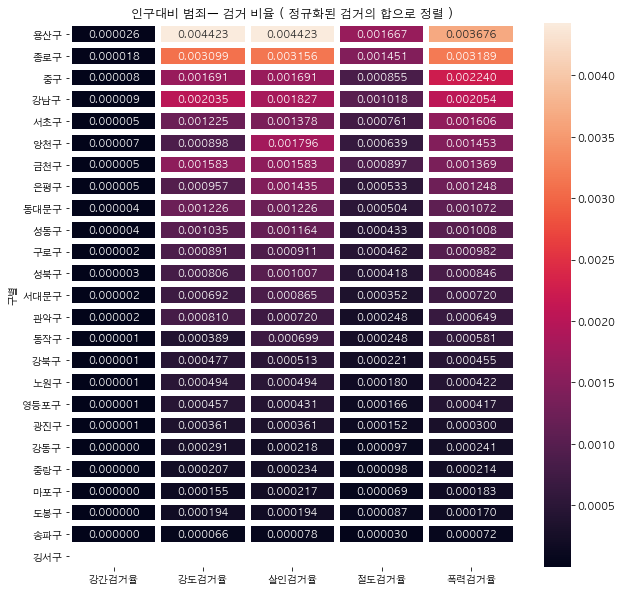

In [23]:
target_cols = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm['강간검거율'] = crime_anal_norm['강간검거율'] / crime_anal_norm['인구대비CCTV'] * 100
crime_anal_norm['강도검거율'] = crime_anal_norm['강도검거율'] / crime_anal_norm['인구대비CCTV'] * 100
crime_anal_norm['살인검거율'] = crime_anal_norm['살인검거율'] / crime_anal_norm['인구대비CCTV'] * 100
crime_anal_norm['절도검거율'] = crime_anal_norm['절도검거율'] / crime_anal_norm['인구대비CCTV'] * 100
crime_anal_norm['폭력검거율'] = crime_anal_norm['폭력검거율'] / crime_anal_norm['인구대비CCTV'] * 100

crime_anal_norm_sort = crime_anal_norm.sort_values(by='폭력검거율', ascending=False)



plt.figure(figsize=(10,10))

sns.heatmap(crime_anal_norm_sort[target_cols] , annot=True, fmt='f', linewidths=5)
plt.title('인구대비CCTV 개수 범죄 검거 비율 ( 폭력검거율 순으로 정렬 )')
plt.show()

/Users/son/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


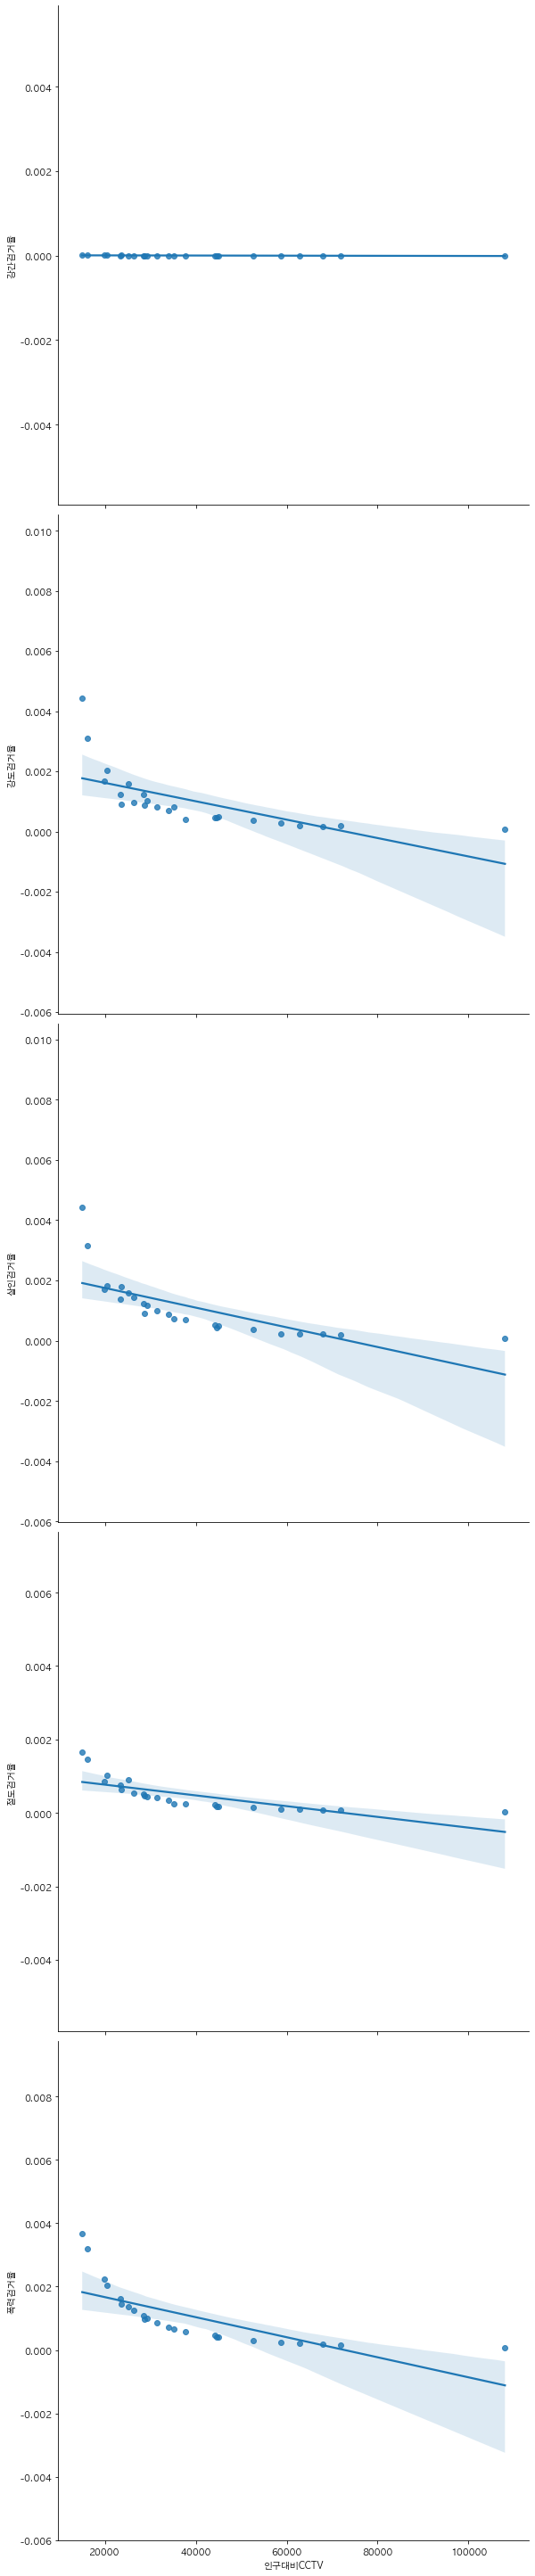

In [32]:
target_cols = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
sns.pairplot(crime_anal_norm, x_vars=['인구대비CCTV'], y_vars=target_cols, kind='reg', size=8)
plt.show()